In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
sae=pd.read_csv('../data/sae_dataset_updated.csv')
sae.head()

,VehicleMarketCode,VehicleNationalCode,VehicleSegmentationGlobal,VehicleModelIntlName,Bodytype_Group,Fuel_Group,Transmission_Group,Drivetype_Group,VehicleKW,VehicleDoors,...,registration_date,Mileage,Price,oricpric,PriceChangeCount,AgeOfVeh,LossVal,DevPerKm,DevPerAge,KmPerAge
0,ES,29263,Small LCV,Combo,Panel van,Diesel,Manual,2WD,73,4.0,...,2008-07-01,238000,2990,2990.0,NaN,4234.0,16331,0.068618,3.857109,56.211620
1,ES,29263,Small LCV,Combo,Panel van,Diesel,Manual,2WD,73,4.0,...,2010-06-15,90000,4499,4499.0,NaN,3520.0,14822,0.164689,4.210795,25.568182
2,ES,29263,Small LCV,Combo,Panel van,Diesel,Manual,2WD,73,4.0,...,2005-07-01,210000,2490,2700.0,1.0,5330.0,16831,0.080148,3.157786,39.399625
3,ES,30020,E,607,Sedan,Diesel,Automated,2WD,150,4.0,...,2009-10-15,259000,6500,6500.0,NaN,4745.0,47750,0.184363,10.063224,54.583772
4,ES,30020,E,607,Sedan,Diesel,Automated,2WD,150,4.0,...,2006-07-01,155000,4900,7500.0,1.0,4965.0,49350,0.318387,9.939577,31.218530


In [3]:
sae.shape

(192880, 29)

Some adjustments to the dataset before starting the analysis

In [4]:
sae['VehicleNationalCode']=sae['VehicleNationalCode'].astype('str')
sae['VehicleGrossNewPrice']=sae['VehicleGrossNewPrice'].astype('int')
sae['registration_date']=pd.to_datetime(sae['registration_date'], format='%Y-%m-%d')
sae['SAEReporteddate']=pd.to_datetime(sae['SAEReporteddate'], format='%Y-%m-%d')
sae['VehicleProductionStart']=pd.to_datetime(sae['VehicleProductionStart'], format='%Y-%m-%d')
sae['VehicleProductionEnd']=pd.to_datetime(sae['VehicleProductionEnd'], format='%Y-%m-%d', errors='coerce')
sae2020=sae[sae.SAEReporteddate=='2020-02-03']
sae2022=sae[sae.SAEReporteddate=='2022-10-12']

In [5]:
sae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192880 entries, 0 to 192879
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   VehicleMarketCode          192880 non-null  object        
 1   VehicleNationalCode        192880 non-null  object        
 2   VehicleSegmentationGlobal  192880 non-null  object        
 3   VehicleModelIntlName       192880 non-null  object        
 4   Bodytype_Group             192880 non-null  object        
 5   Fuel_Group                 192880 non-null  object        
 6   Transmission_Group         192880 non-null  object        
 7   Drivetype_Group            192880 non-null  object        
 8   VehicleKW                  192880 non-null  int64         
 9   VehicleDoors               192859 non-null  float64       
 10  VehicleWheelBase           192834 non-null  float64       
 11  VehicleSeats               192880 non-null  int64   

In [12]:
sae.round(2)

,VehicleMarketCode,VehicleNationalCode,VehicleSegmentationGlobal,VehicleModelIntlName,Bodytype_Group,Fuel_Group,Transmission_Group,Drivetype_Group,VehicleKW,VehicleDoors,...,registration_date,Mileage,Price,oricpric,PriceChangeCount,AgeOfVeh,LossVal,DevPerKm,DevPerAge,KmPerAge
0,ES,29263,Small LCV,Combo,Panel van,Diesel,Manual,2WD,73,4.0,...,2008-07-01,238000,2990,2990.0,NaN,4234.0,16331,0.07,3.86,56.21
1,ES,29263,Small LCV,Combo,Panel van,Diesel,Manual,2WD,73,4.0,...,2010-06-15,90000,4499,4499.0,NaN,3520.0,14822,0.16,4.21,25.57
2,ES,29263,Small LCV,Combo,Panel van,Diesel,Manual,2WD,73,4.0,...,2005-07-01,210000,2490,2700.0,1.0,5330.0,16831,0.08,3.16,39.40
3,ES,30020,E,607,Sedan,Diesel,Automated,2WD,150,4.0,...,2009-10-15,259000,6500,6500.0,NaN,4745.0,47750,0.18,10.06,54.58
4,ES,30020,E,607,Sedan,Diesel,Automated,2WD,150,4.0,...,2006-07-01,155000,4900,7500.0,1.0,4965.0,49350,0.32,9.94,31.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192875,PT,934825,B,Micra,Hatchback,Petrol,Manual,2WD,68,5.0,...,2022-05-15,2000,19490,19490.0,NaN,150.0,1765,0.88,11.77,13.33
192876,PT,934825,B,Micra,Hatchback,Petrol,Manual,2WD,68,5.0,...,2022-04-15,5038,18000,18000.0,NaN,180.0,3255,0.65,18.08,27.99
192877,PT,934825,B,Micra,Hatchback,Petrol,Manual,2WD,68,5.0,...,2022-03-15,4100,20950,20950.0,NaN,211.0,305,0.07,1.45,19.43
192878,PT,934825,B,Micra,Hatchback,Petrol,Manual,2WD,68,5.0,...,2022-05-15,650,21950,20950.0,2.0,150.0,-695,-1.07,-4.63,4.33


### Correlation between fields (numerical data)

The best way to explore all numeric fields without investigating them individually is to create a heatmap. I can use it to visualize the pairwise correlations between each two variables

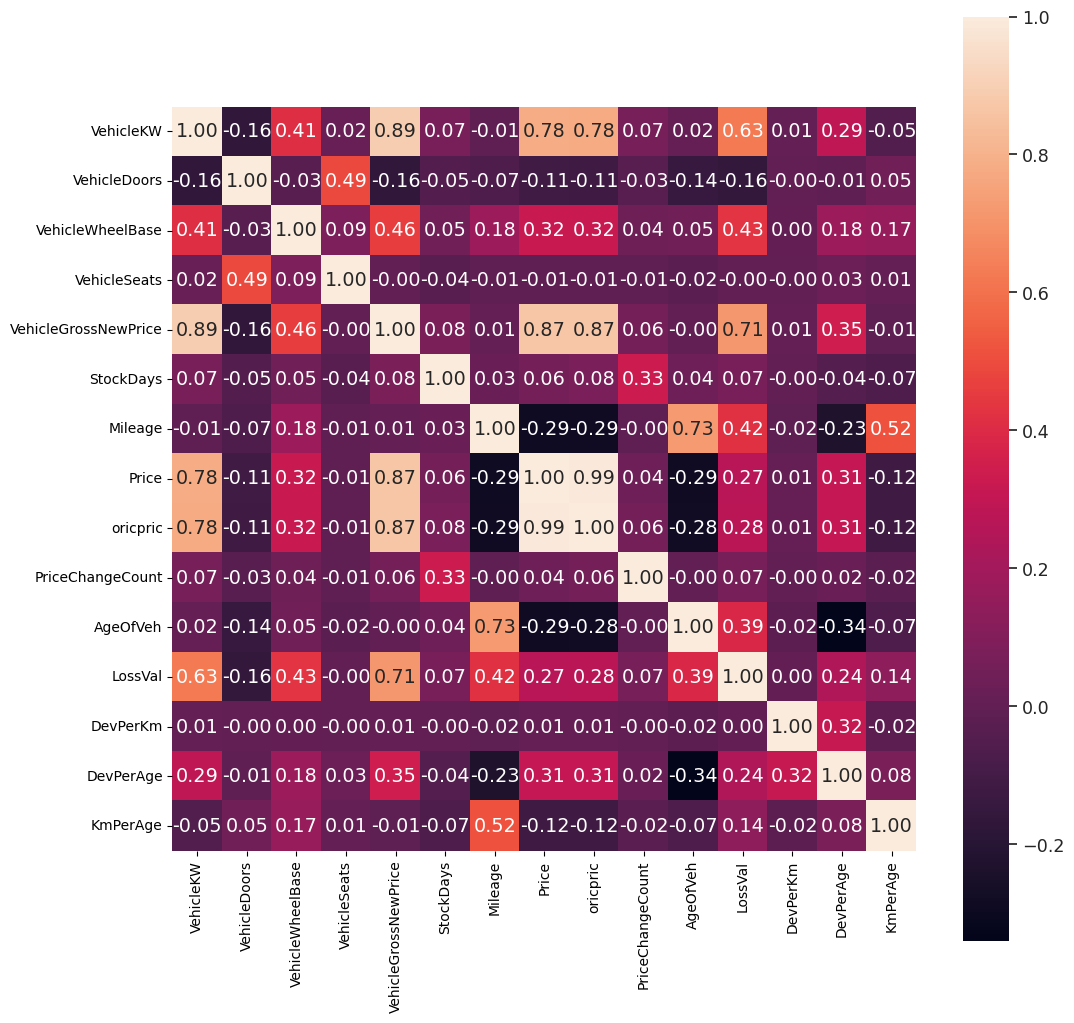

In [6]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)

sns.set(font_scale = 1.15)
sns.heatmap(sae.corr(),
           cbar=True,
           annot=True,
           square=True,
           fmt='.2f',
           ax=ax);

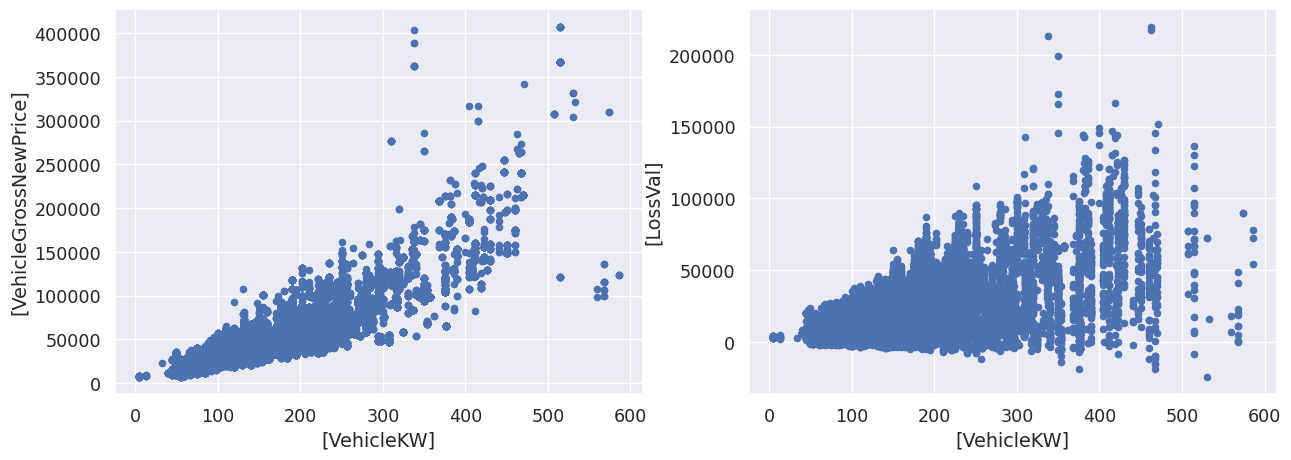

In [26]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sae.plot(x=['VehicleKW'], y=['VehicleGrossNewPrice'], kind='scatter', ax=axes[0])
sae.plot(x=['VehicleKW'], y=['LossVal'], kind='scatter', ax=axes[1])

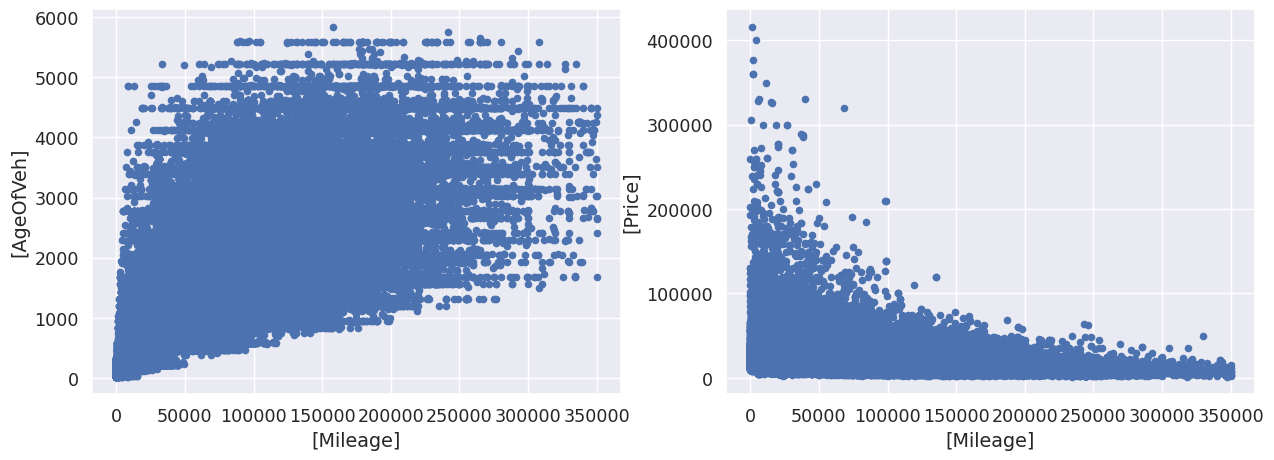

In [27]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sae.plot(x=['Mileage'], y=['AgeOfVeh'], kind='scatter', ax=axes[0])
sae.plot(x=['Mileage'], y=['Price'], kind='scatter', ax=axes[1])

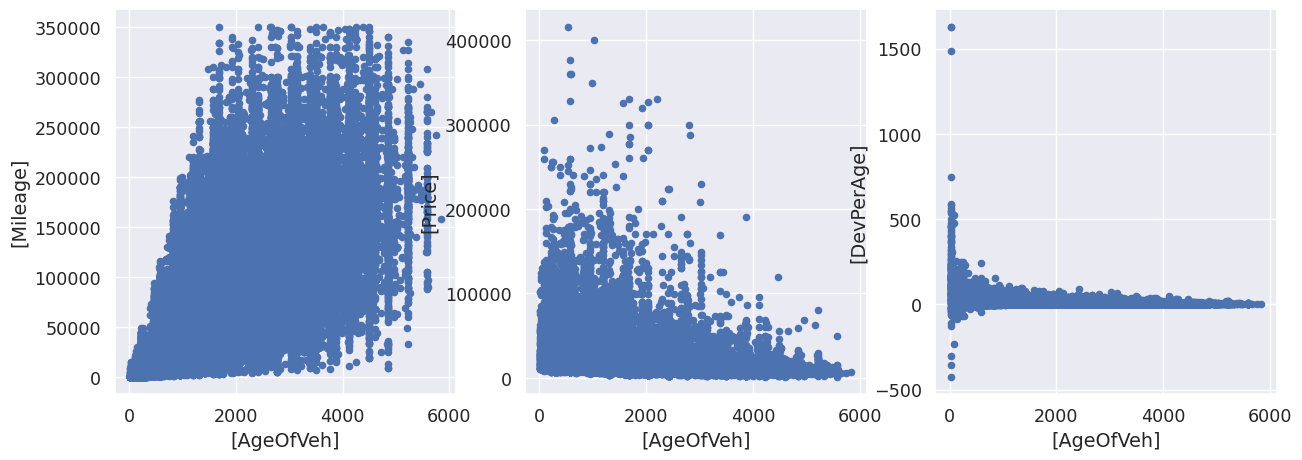

In [28]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sae.plot(x=['AgeOfVeh'], y=['Mileage'], kind='scatter', ax=axes[0])
sae.plot(x=['AgeOfVeh'], y=['Price'], kind='scatter', ax=axes[1])
sae.plot(x=['AgeOfVeh'], y=['DevPerAge'], kind='scatter', ax=axes[2])

#### Outliers

I want to show those records with extreme values, outside the interquartile range. These records are usually eliminated because they could shift the mean in a fictitious way. That is, the robustness of the data. Outliers 'weigh more' than data close to the mean. A single value is enough to greatly influence the mean of the dataset.

In [20]:
stats=sae.describe().T

stats['IQR']=stats['75%']-stats['25%']

In [24]:
stats.sort_values('IQR', ascending=False).head()

,count,mean,std,min,25%,50%,75%,max,IQR
Mileage,192880.0,76988.615009,57069.621542,1.0,27780.75,69000.0,113727.75,350000.0,85947.00
VehicleGrossNewPrice,192880.0,30259.096283,18962.733322,7140.0,20450.00,25850.0,33390.00,407250.0,12940.00
oricpric,192684.0,18671.701423,14114.448980,-1.0,11100.00,15500.0,21500.00,415900.0,10400.00
Price,192880.0,18394.630418,13789.559508,1390.0,10990.00,15400.0,21028.00,415900.0,10038.00
LossVal,192880.0,11864.465865,9829.591844,-24251.0,6160.00,9605.0,14685.25,219610.0,8525.25


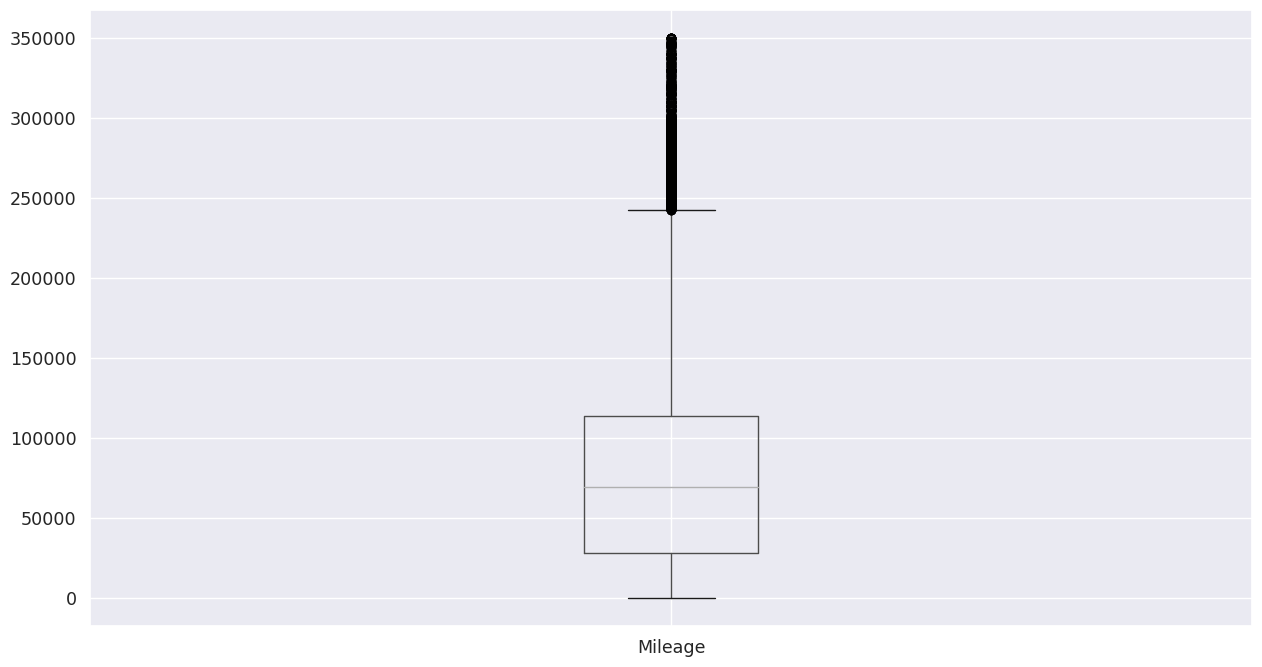

In [25]:
sae[['Mileage']].boxplot(figsize=(15,8))

In [29]:
outliers=pd.DataFrame(columns=stats.index)

outliers.shape

(0, 15)

In [30]:
sae.shape

(192880, 29)

In [31]:
for c in stats.index:
    iqr=stats.at[c, 'IQR']
    cutoff=1.5*iqr #test of Tukey
    
    lower=stats.at[c, '25%']-cutoff
    upper=stats.at[c, '75%']+cutoff
    
    res=sae[(sae[c]<lower)|(sae[c]>upper)].copy()
    res['outliers']=c
    outliers=outliers.append(res, sort=True)
    
outliers['outliers'].value_counts()

VehicleDoors            34956
VehicleSeats            28614
DevPerKm                21167
DevPerAge               16499
VehicleWheelBase        15163
VehicleGrossNewPrice    13670
VehicleKW               12862
Price                   12375
oricpric                12022
LossVal                  9314
StockDays                8383
PriceChangeCount         7673
KmPerAge                 5787
AgeOfVeh                 5375
Mileage                  1805
Name: outliers, dtype: int64

In [32]:
def get_outliers(stats: pd.DataFrame, threshold: float=1.5) -> pd.DataFrame:
    outliers=pd.DataFrame(columns=stats.index)
    
    for c in stats.index:
        iqr=stats.at[c, 'IQR']
        cutoff=1.5*iqr #test of Tukey
        
        lower=stats.at[c, '25%']-cutoff
        upper=stats.at[c, '75%']+cutoff
        
        res=sae[(sae[c]<lower)|(sae[c]>upper)].copy()
        res['outliers']=c
        outliers=outliers.append(res, sort=True)
        
    return outliers

In [33]:
outliers.head()

,AgeOfVeh,Bodytype_Group,DevPerAge,DevPerKm,Drivetype_Group,Fuel_Group,KmPerAge,LossVal,Mileage,PostCode,...,VehicleModelIntlName,VehicleNationalCode,VehicleProductionEnd,VehicleProductionStart,VehicleSeats,VehicleSegmentationGlobal,VehicleWheelBase,oricpric,outliers,registration_date
682,4433.0,Coupe,8.443492,0.337207,4WD,Petrol,25.039477,37430,111000,33400,...,A5,36963,2011-09-01,2007-04-01,4,D,2751.0,13900.0,VehicleKW,2007-12-15
683,5582.0,Coupe,7.601218,0.174366,4WD,Petrol,43.593515,42430,243339,12006,...,A5,36963,2011-09-01,2007-04-01,4,D,2751.0,10500.0,VehicleKW,2007-07-01
684,4234.0,Coupe,10.162966,0.195591,4WD,Petrol,51.960321,43030,220000,4745,...,A5,36963,2011-09-01,2007-04-01,4,D,2751.0,11900.0,VehicleKW,2008-07-01
685,4600.0,Coupe,8.789130,0.212789,4WD,Petrol,41.304348,40430,190000,46250,...,A5,36963,2011-09-01,2007-04-01,4,D,2751.0,12500.0,VehicleKW,2007-07-01
686,5415.0,Coupe,7.706371,0.217344,4WD,Petrol,35.457064,41730,192000,18151,...,A5,36963,2011-09-01,2007-04-01,4,D,2751.0,13000.0,VehicleKW,2007-12-15


In [34]:
clean_index=[i for i in sae.index if i not in outliers.index]

len(clean_index)

104880

In [35]:
sae=sae.iloc[clean_index]
sae.shape

(104880, 29)

In [36]:
len(outliers.index.unique())

88000

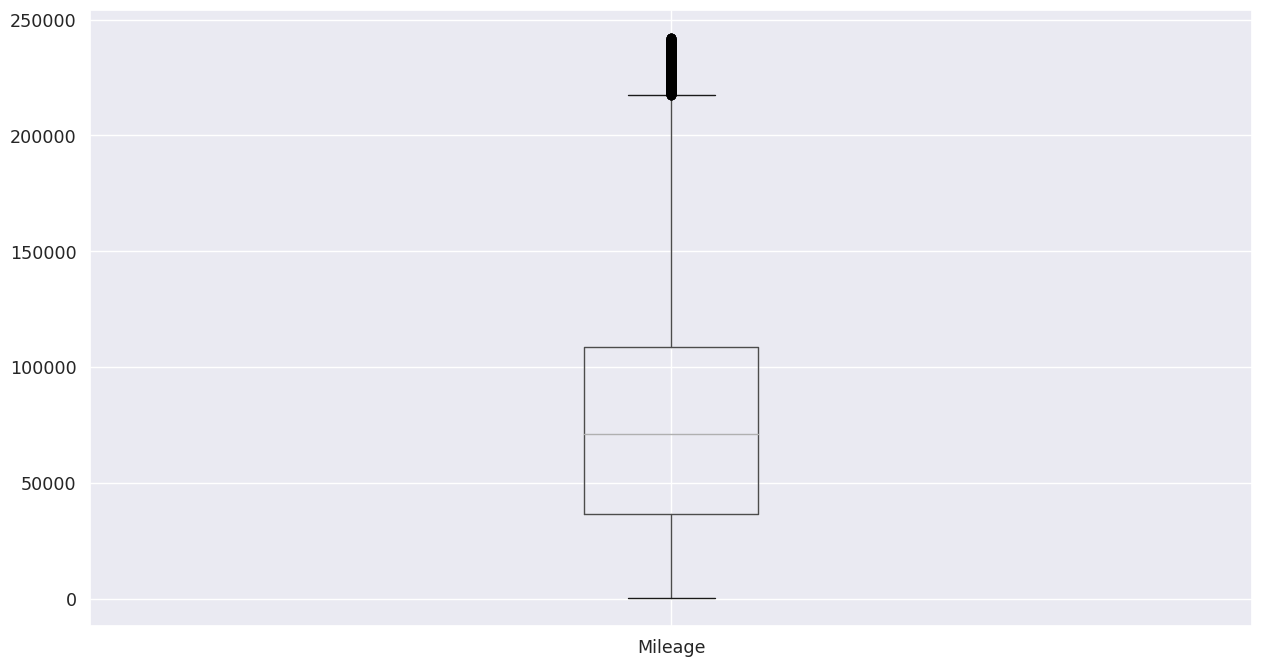

In [37]:
sae[['Mileage']].boxplot(figsize=(15,8))

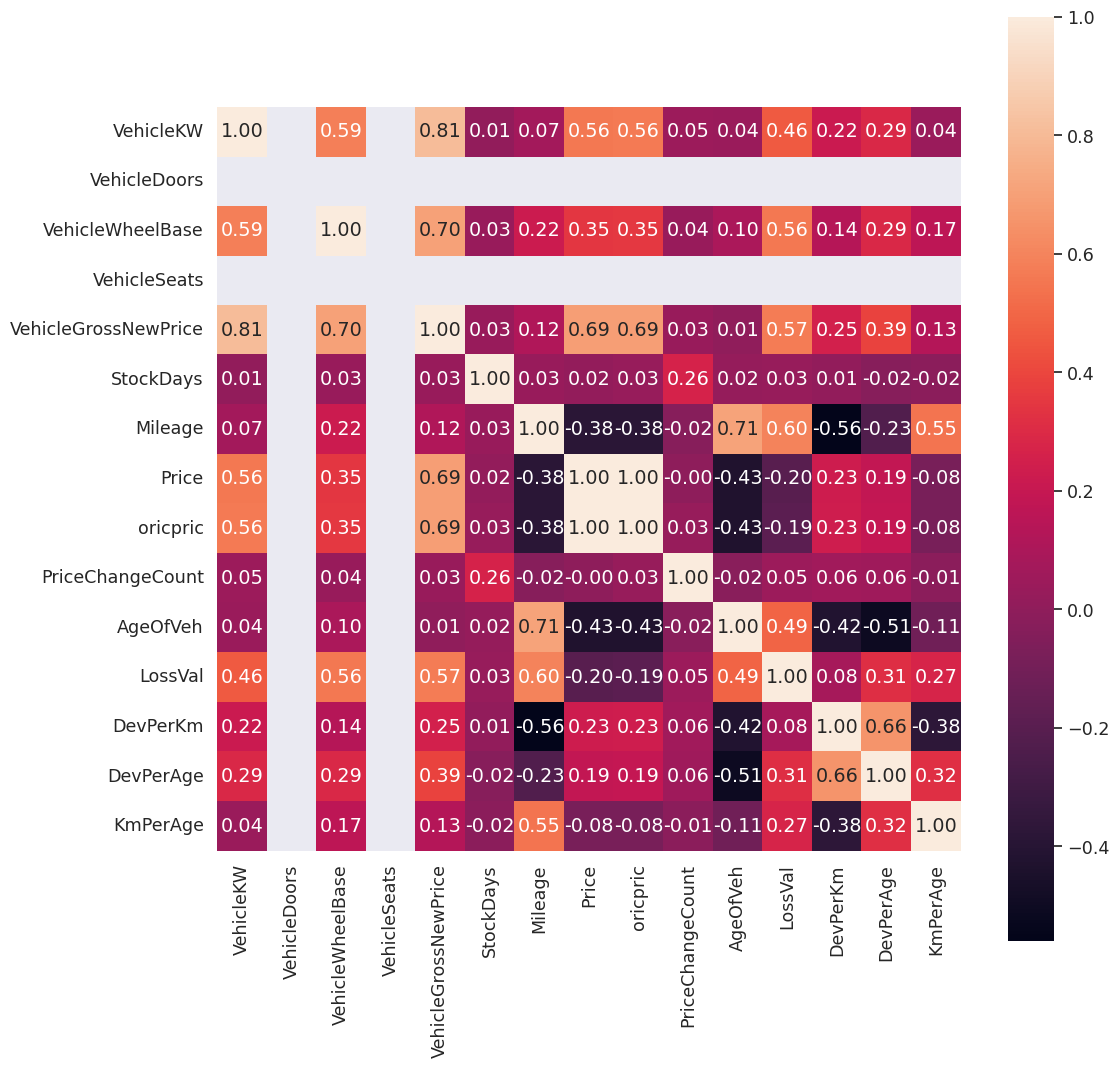

In [38]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)

sns.set(font_scale = 1.15)
sns.heatmap(sae.corr(),
           cbar=True,
           annot=True,
           square=True,
           fmt='.2f',
           ax=ax);

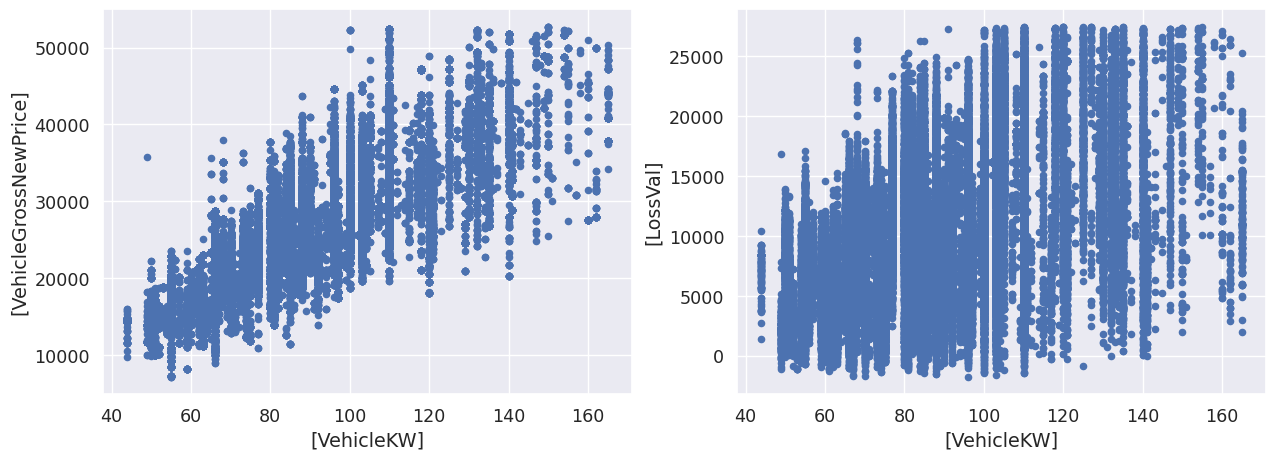

In [40]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sae.plot(x=['VehicleKW'], y=['VehicleGrossNewPrice'], kind='scatter', ax=axes[0])
sae.plot(x=['VehicleKW'], y=['LossVal'], kind='scatter', ax=axes[1])

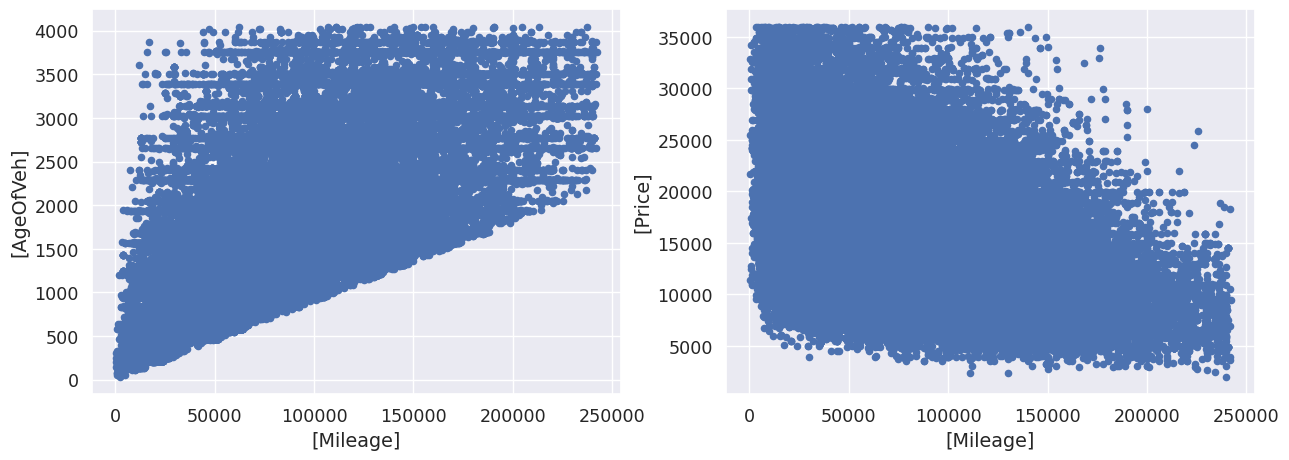

In [41]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sae.plot(x=['Mileage'], y=['AgeOfVeh'], kind='scatter', ax=axes[0])
sae.plot(x=['Mileage'], y=['Price'], kind='scatter', ax=axes[1])

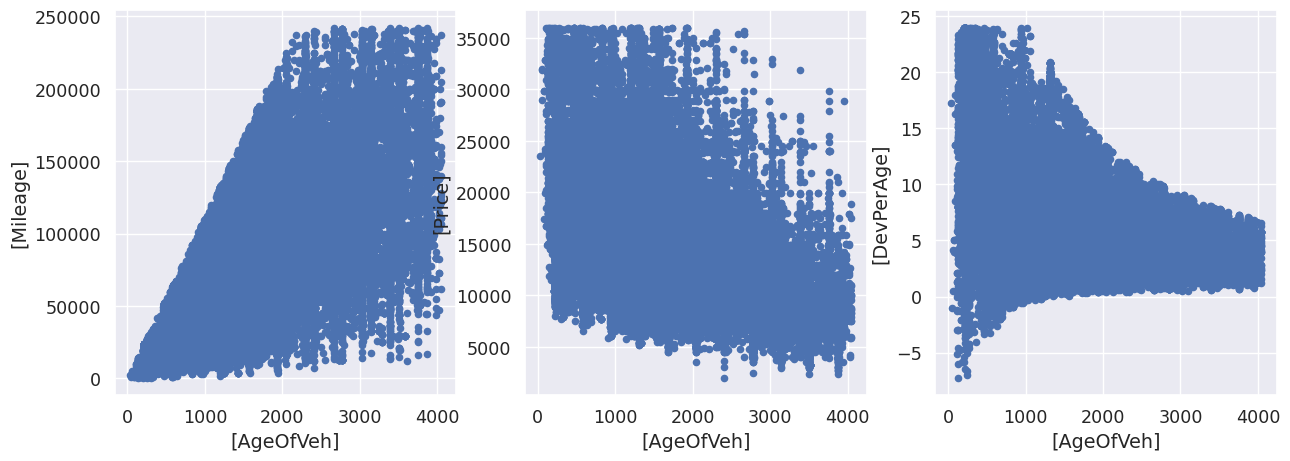

In [42]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sae.plot(x=['AgeOfVeh'], y=['Mileage'], kind='scatter', ax=axes[0])
sae.plot(x=['AgeOfVeh'], y=['Price'], kind='scatter', ax=axes[1])
sae.plot(x=['AgeOfVeh'], y=['DevPerAge'], kind='scatter', ax=axes[2])

In [7]:
sae.Price.describe()

count    192880.000000
mean      18394.630418
std       13789.559508
min        1390.000000
25%       10990.000000
50%       15400.000000
75%       21028.000000
max      415900.000000
Name: Price, dtype: float64

In [43]:
sae.Price.describe()

count    104880.000000
mean      15380.411318
std        5963.662958
min        1990.000000
25%       10900.000000
50%       14500.000000
75%       18900.000000
max       36000.000000
Name: Price, dtype: float64

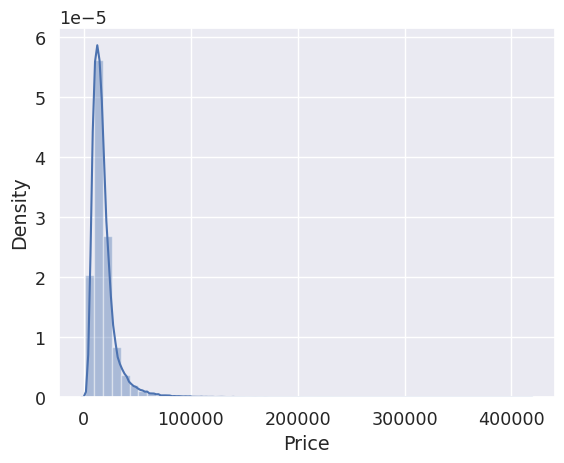

In [8]:
sns.distplot(sae.Price)

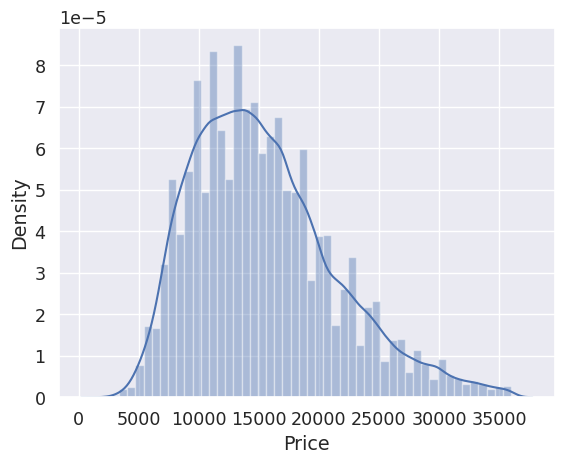

In [44]:
sns.distplot(sae.Price)

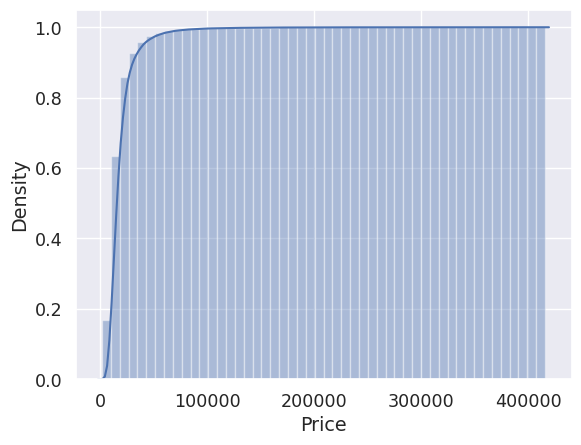

In [10]:
sns.distplot(sae.Price,
            hist_kws={'cumulative':True},
            kde_kws={'cumulative':True}); #kernel density estimation

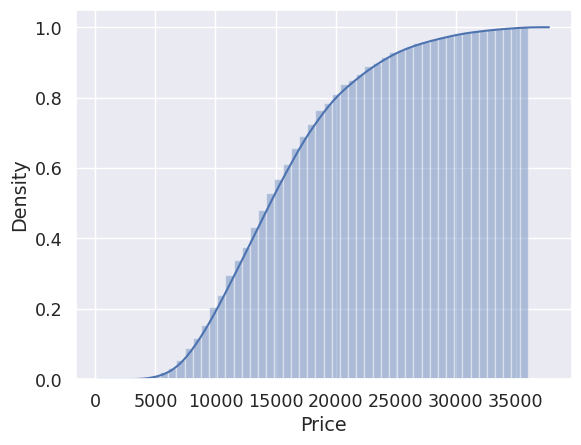

In [45]:
sns.distplot(sae.Price,
            hist_kws={'cumulative':True},
            kde_kws={'cumulative':True}); #kernel density estimation